# Logistic Regression

## Importing the necessary libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
import joblib

## Loading the Processed Dataset

In [9]:
df = pd.read_csv("weather_preprocessed.csv")

In [10]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
0,27,13.4,22.9,0.6,6.4,0.4,4.0,44.0,5.0,3.0,...,1007.7,1007.1,8.0,7.0,16.9,21.8,False,False,12,1
1,27,7.4,25.1,0.0,7.6,11.2,2.0,44.0,0.0,6.0,...,1010.6,1007.8,7.0,7.0,17.2,24.3,False,False,12,2
2,27,12.9,25.7,0.0,8.0,0.7,5.0,46.0,5.0,6.0,...,1007.6,1008.7,7.0,2.0,21.0,23.2,False,False,12,3
3,27,9.2,28.0,0.0,2.6,7.3,11.0,24.0,13.0,14.0,...,1017.6,1012.8,7.0,7.0,18.1,26.5,False,False,12,4
4,27,17.5,32.3,1.0,2.8,0.1,4.0,41.0,12.0,0.0,...,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False,12,5


In [11]:
df.shape

(145460, 24)

## Dividing the dataset into Independent and Dependent features

In [12]:
X = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

### Train test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, stratify = y, random_state = 0)

In [14]:
y_train

43447     False
140904    False
54615     False
109793    False
74462     False
          ...  
106567    False
52791      True
56339     False
82299      True
115175    False
Name: RainTomorrow, Length: 116368, dtype: bool

## Handling imbalanced dataset

<Axes: ylabel='count'>

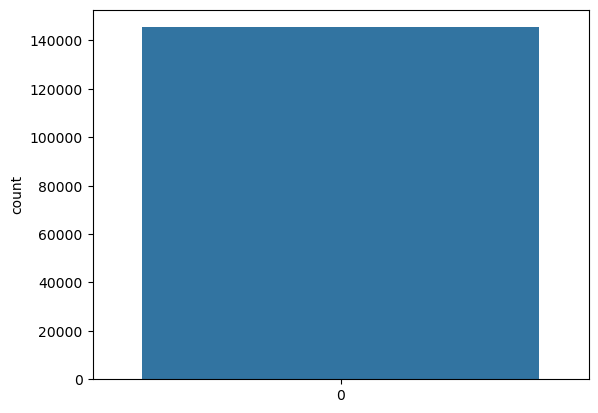

In [15]:
sns.countplot(df["RainTomorrow"])

In [16]:
sm=SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({False: 90866, True: 25502})
The number of classes after fit Counter({False: 90866, True: 90866})


## Logistic Regression

In [17]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)

c:\Users\verma\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[17449  5268]
 [ 1499  4876]]
0.767393097758834
              precision    recall  f1-score   support

       False       0.92      0.77      0.84     22717
        True       0.48      0.76      0.59      6375

    accuracy                           0.77     29092
   macro avg       0.70      0.77      0.71     29092
weighted avg       0.82      0.77      0.78     29092



In [19]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None)

AttributeError: module 'sklearn.metrics' has no attribute 'plot_roc_curve'

## Saving the model to reuse it again

In [20]:
joblib.dump(logreg,"LogisticRegression_model.pkl")

['LogisticRegression_model.pkl']